In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
cardio_data_train = pd.read_csv("cardio-train.csv", sep = ";")
cardio_data_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [3]:
print("Number of features in the cardio data: ",len(cardio_data_train.columns))
print("Features: ")
print("-"*10)
features_desc_from_kaggle = ["id","Age(days)", "Gender","Height(cm)", "Weight(kg)", "Systolic blood pressure", \
 "Diastolic blood pressure", "Cholesterol", "Glucose", "Smoking" ,\
 "Alcohol intake", "Physical activity", "Presence(1) or absence(0) of cardiovascular disease (Target Variable)"]


for i in range(len(cardio_data_train.columns)):
    print(cardio_data_train.columns[i]+" -----> "+features_desc_from_kaggle[i])

Number of features in the cardio data:  13
Features: 
----------
id -----> id
age -----> Age(days)
gender -----> Gender
height -----> Height(cm)
weight -----> Weight(kg)
ap_hi -----> Systolic blood pressure
ap_lo -----> Diastolic blood pressure
cholesterol -----> Cholesterol
gluc -----> Glucose
smoke -----> Smoking
alco -----> Alcohol intake
active -----> Physical activity
cardio -----> Presence(1) or absence(0) of cardiovascular disease (Target Variable)


In [4]:
cardio_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


In [5]:
cardio_data_train.isna().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [6]:
cardio_data_train.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print("cholesterol unique values: ",cardio_data_train["cholesterol"].unique())
print("glucose unique values: ",cardio_data_train["gluc"].unique())
print("gender unique values: ",cardio_data_train["gender"].unique())

cholesterol unique values:  [nan 'Normal' 'High' 'Above Normal']
glucose unique values:  ['Normal' nan 'High' 'Above Normal']
gender unique values:  [nan 'Men' 'Women']


In [8]:
#High=2, Above Normal=1, Normal=0
def replace012(x):
    if x == "High":
        return 2
    elif x == "Above Normal":
        return 1
    elif x =="Normal":
        return 0

cardio_data_train["cholesterol"] = cardio_data_train["cholesterol"].apply(replace012)
cardio_data_train["gluc"] = cardio_data_train["gluc"].apply(replace012)

In [9]:
#Women=0, Men=1
def replace01(x):
    if x == "Women":
        return 0
    elif x == "Men":
        return 1
cardio_data_train["gender"] = cardio_data_train["gender"].apply(replace01)

In [10]:
cardio_data_train.drop("id", axis=1, inplace=True)
cardio_data_train["age"] = (cardio_data_train["age"]/365).round()

In [11]:
cardio_data_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.0,NaN,163.0,75.0,120.0,NaN,NaN,0.0,0.0,0.0,1.0,0
1,44.0,1.0,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,54.0,NaN,170.0,75.0,120.0,NaN,NaN,0.0,0.0,0.0,1.0,1
3,52.0,1.0,NaN,89.0,NaN,80.0,0.0,NaN,0.0,NaN,NaN,0
4,NaN,NaN,158.0,74.0,NaN,93.0,2.0,NaN,0.0,1.0,1.0,1


In [12]:
cardio_data_train.isna().sum()

age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def test_logistic_regression_model(data):
    scalar = MinMaxScaler()
    y = data.loc[:,"cardio"]
    X = data.drop("cardio",1)
    X = scalar.fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    clf = LogisticRegression()
    clf.fit(x_train,y_train)

    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)

    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test,y_pred_test)
    return accuracy_train, accuracy_test, f1


In [14]:
orig_cardio_data_train = cardio_data_train.copy()

In [15]:
drop_na_data_train = orig_cardio_data_train.copy().dropna()

accuracy_train, accuracy_test, f1 = test_logistic_regression_model(drop_na_data_train)

print("Train Accuracy after dropping rows with NaN values: ",accuracy_train)
print("Test Accuracy after dropping rows with NaN values: ",accuracy_test)
print("f1 score after dropping rows with NaN values: ",f1)

Train Accuracy after dropping rows with NaN values:  1.0
Test Accuracy after dropping rows with NaN values:  0.5
f1 score after dropping rows with NaN values:  0.0


In [16]:
mean_na_data_train = orig_cardio_data_train.copy()
for x in mean_na_data_train.columns:
    mean_column = np.nanmean(mean_na_data_train[x].values)
    mean_na_data_train[x].replace(np.nan, mean_column, inplace=True)
    
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(mean_na_data_train)

print("Train Accuracy after replacing NaN with mean: ",accuracy_train)
print("Test Accuracy after replacing NaN with mean: ",accuracy_test)
print("f1 score after replacing NaN with mean: ",f1)

Train Accuracy after replacing NaN with mean:  0.685
Test Accuracy after replacing NaN with mean:  0.68
f1 score after replacing NaN with mean:  0.6923076923076923


## Applying the model

In [106]:
train_data = pd.read_csv("cardio-train.csv", sep=";")
print(train_data.shape)
train_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [107]:
validation_data = pd.read_csv("cardio-validation.csv", sep=",")
print(validation_data.shape)
validation_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17934,18936.0,Men,165.0,60.0,NaN,80.0,Normal,NaN,0.0,0.0,1.0,1
1,52450,17987.0,NaN,NaN,58.8,120.0,90.0,Normal,Normal,NaN,0.0,1.0,0
2,37653,NaN,NaN,159.0,93.0,130.0,90.0,High,Normal,0.0,0.0,NaN,1
3,96970,22851.0,Women,172.0,NaN,NaN,100.0,Normal,Normal,0.0,0.0,1.0,1
4,50977,NaN,Women,NaN,116.0,NaN,80.0,High,NaN,NaN,NaN,1.0,1


In [108]:
train_data.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
train_data.isna().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [110]:
train_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [111]:
# for col in train_data.columns:
#     plt.figure()
#     train_data.boxplot([col])

In [112]:
mean_cols = ['age', 'height', 'weight']
median_cols = ['ap_hi', 'ap_lo']
mode_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
outlier_cols = ['height', 'weight', 'ap_hi', 'ap_lo']

In [113]:
def preprocess(data):
    data["cholesterol"] = data["cholesterol"].apply(replace012)
    data["gluc"] = data["gluc"].apply(replace012)
    data["gender"] = data["gender"].apply(replace01)
    data.drop("id", axis=1, inplace=True)
    data["age"] = (data["age"]/365).round()
    for col in mean_cols:
        mean_column = np.nanmean(data[col].values)
        data[col].replace(np.nan, mean_column, inplace=True)
    for col in median_cols:
        median_column = np.nanmedian(data[col].values)
        data[col].replace(np.nan, median_column, inplace=True)
    for col in mode_cols:
        mode_column, _ = stats.mode(data[col])
        data[col].replace(np.nan, mode_column[0], inplace=True)
    for col in outlier_cols:
        low = data[col].quantile(0.10)
        high = data[col].quantile(0.90)
        data[col] = np.where(data[col] < low, low, data[col])
        data[col] = np.where(data[col] > high, high, data[col])
#     scalar = MinMaxScaler()
#     data = scalar.fit_transform(data)
    return data


In [114]:
train_data = preprocess(train_data)
validation_data = preprocess(validation_data)
# test_data = preprocess(test_data)

In [115]:
train_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.000000,75.0,120.0,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.000000,68.0,110.0,80.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,168.000000,75.0,120.0,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,163.934343,88.0,120.0,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,159.900000,74.0,120.0,90.0,2.0,0.0,0.0,1.0,1.0,1


In [116]:
validation_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,52.000000,1.0,165.000000,60.000000,120.0,80.0,0.0,0.0,0.0,0.0,1.0,1
1,49.000000,1.0,164.639706,60.000000,120.0,90.0,0.0,0.0,0.0,0.0,1.0,0
2,53.046392,1.0,159.000000,90.000000,130.0,90.0,2.0,0.0,0.0,0.0,1.0,1
3,63.000000,0.0,172.000000,73.778316,120.0,90.0,0.0,0.0,0.0,0.0,1.0,1
4,53.046392,0.0,164.639706,90.000000,120.0,80.0,2.0,0.0,0.0,0.0,1.0,1


In [117]:
train_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [118]:
validation_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

age
45.0
60.0
gender
0.0
1.0
height
159.99
168.0
weight
60.99
88.0
ap_hi
110.0
150.0
ap_lo
80.0
90.0
cholesterol
0.0
1.0
gluc
0.0
0.0
smoke
0.0
0.0
alco
0.0
0.0
active
0.0
1.0
cardio
0.0
1.0


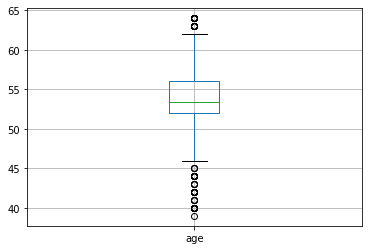

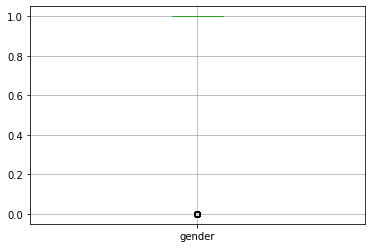

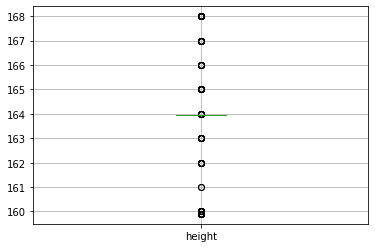

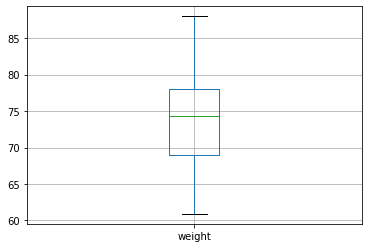

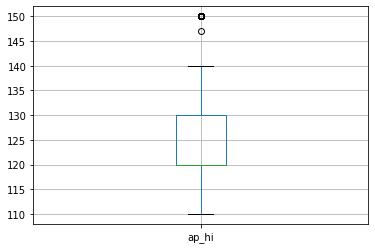

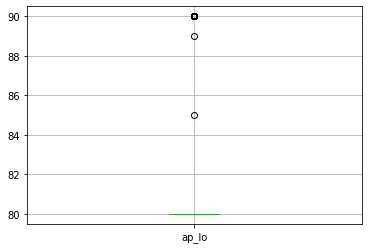

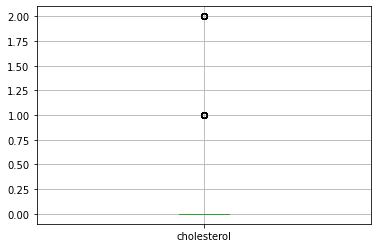

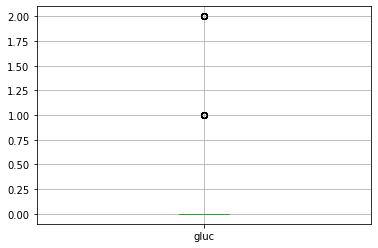

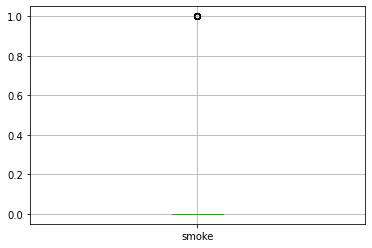

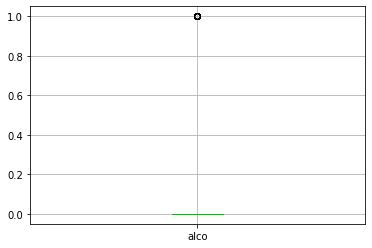

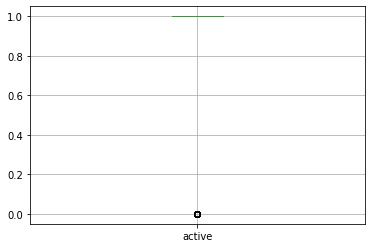

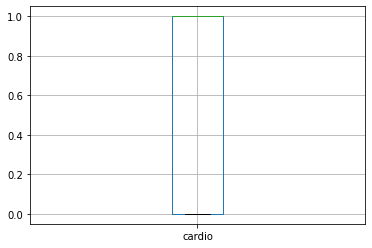

In [119]:
for col in train_data.columns:
    plt.figure()
    train_data.boxplot([col])
    print(col)
    print(train_data[col].quantile(0.10))
    print(train_data[col].quantile(0.90))

In [120]:
total_train_data = train_data.append(validation_data)
y = total_train_data.loc[:,"cardio"]
X = total_train_data.drop("cardio", 1)


In [121]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [122]:
clf_log_reg = LogisticRegression()
clf_log_reg.fit(x_train,y_train)

y_pred_test = clf_log_reg.predict(x_test)
y_pred_train = clf_log_reg.predict(x_train)

print("Train Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))
print("f1 score: ",f1_score(y_test,y_pred_test))

# kagggle score=0.68000 (Mean Replacement + Logistic Regression)
# kagggle score=0.65600 (Mean+Mode Replacement + Logistic Regression)
# kagggle score=0.61600 (Mean+Mode+Median+Outlier Replacement + Logistic Regression)

Train Accuracy:  0.72375
Test Accuracy:  0.705
f1 score:  0.6844919786096257


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
test_data = pd.read_csv("cardio-test.csv", sep=",")
print(test_data.shape)
test_data = preprocess(test_data)
test_data.head()

(250, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,55.0,1,156.0,57.0,110.0,70.0,0,0,0,1,0
1,50.0,1,160.0,60.0,120.0,80.0,0,0,0,0,1
2,56.0,0,170.0,80.0,140.0,70.0,0,0,0,0,1
3,64.0,1,158.0,80.0,150.0,90.0,2,0,0,0,1
4,56.0,1,158.0,92.0,140.0,90.0,0,1,0,0,0


In [124]:
# REPLACE CLF
y_pred_submission = clf_log_reg.predict(test_data)
df_result = pd.DataFrame(y_pred_submission,columns=["cardio"])
sample = pd.read_csv("sample-submission.csv")
df_result_final = pd.concat([sample.loc[:,"id"],df_result], axis=1)
df_result_final.to_csv("submissions/mean-mode-median-outlier-logistic-regression.csv", index=False)